In [70]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [71]:
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv("/Users/nlili/Desktop/Legal/train.csv")

In [73]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
data.shape

(8523, 12)

In [43]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [74]:
## Checking for the null values

data.isnull().sum()*100/len(data)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [75]:
## Checking for the duplicate values
data.duplicated().any()


np.False_

In [47]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [76]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [77]:
## handnig the missing values for Item_Weight through univariate imputation and multivariate imputation
## Univariate- Mean, median & mode, constant , interpolate
## biravriate Imputation- Regression, K-nearest neighbours, machine learning based imputation
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()
mode_weight = data['Item_Weight'].mode()
print(mean_weight)
print(median_weight)
print(mode_weight)

12.857645184135976
12.6
0    12.15
Name: Item_Weight, dtype: float64


In [78]:
data['Item_Weight_mean']= data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median']= data['Item_Weight'].fillna(median_weight)

In [79]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [80]:
print('Original Weight Variable Variance', data['Item_Weight'].var())
print('Item weight variance after inpute with  mean ', data['Item_Weight_mean'].var())
print('Item weight variance after inpute with median ', data['Item_Weight_median'].var())

Original Weight Variable Variance 21.561688259836558
Item weight variance after inpute with  mean  17.86012173506058
Item weight variance after inpute with median  17.869561454073647


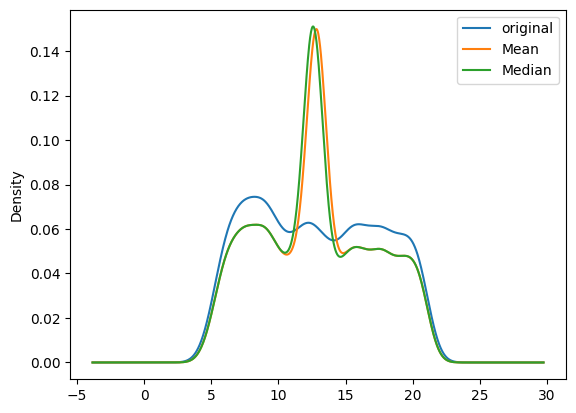

In [81]:
## Plot to check the distribution before and after imputation
data['Item_Weight'].plot(kind="kde", label="original")
data['Item_Weight_mean'].plot(kind="kde", label="Mean")
data['Item_Weight_median'].plot(kind="kde",label="Median")
plt.legend()
plt.show()


<Axes: >

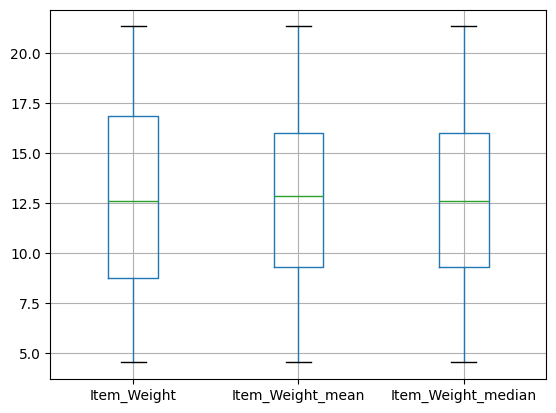

In [82]:
## Try box plot

data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

## as we can see, after imputation with mean/median this has led to the reduction in the overall spread of the data

In [83]:
##interpolate
data['Item_Weight_Interpolate']= data['Item_Weight'].interpolate(method="linear")


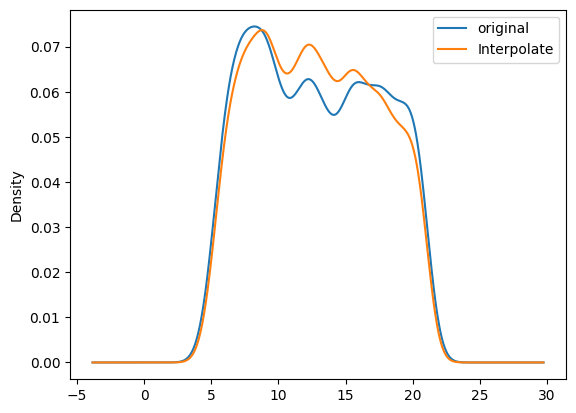

In [84]:
data['Item_Weight'].plot(kind="kde", label="original")
data['Item_Weight_Interpolate'].plot(kind="kde", label="Interpolate")
plt.legend()
plt.show()

## distribution is very close wrt to the orginal hence this method is better

In [85]:
## Multivariate Imputation
from sklearn.impute import KNNImputer

In [86]:
knn = KNNImputer(n_neighbors=10, weights = "distance")

In [87]:
data["knn_imputer_item_weights"] = knn.fit_transform(data[['Item_Weight']])

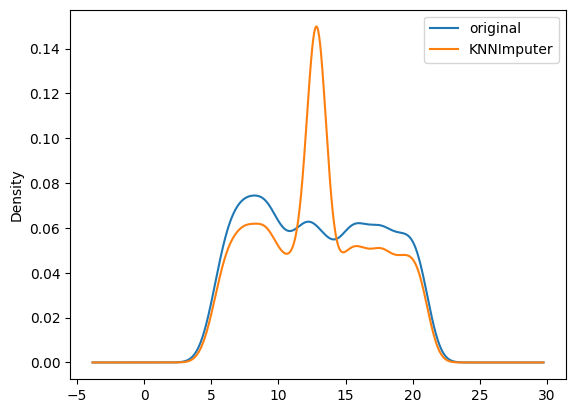

In [88]:
data['Item_Weight'].plot(kind="kde", label="original")
data['knn_imputer_item_weights'].plot(kind="kde", label="KNNImputer")
plt.legend()
plt.show()

In [61]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_Interpolate,knn_imputer_item_weights
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93,8.93


In [89]:
data = data.drop(['Item_Weight_mean','Item_Weight_median','knn_imputer_item_weights','Item_Weight'], axis=1) 

In [91]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [92]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Interpolate         0
dtype: int64

In [93]:
data['Outlet_Size'].nunique()

3

In [94]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [95]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [96]:
data.pivot_table(values='Outlet_Size', columns= 'Outlet_Type', aggfunct=lamda x:x.mode()[0])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2351761724.py, line 1)

In [97]:
mode_outlet = data.pivot_table(values='Outlet_Size', 
                 columns='Outlet_Type', 
                 aggfunc=lambda x: x.mode()[0])

In [98]:
missing_values = data['Outlet_Size'].isnull()

In [99]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [100]:
data.loc[missing_values,'Outlet_Size']=data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet[x])

In [101]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_Interpolate      0
dtype: int64

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Item_Weight_Interpolate    8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [103]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [104]:
data.replace({'Item_Fat_Content': {'Low Fat': 'LF','low fat': 'LF','reg':'Regular'}}, inplace=True)

In [105]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [106]:
## Item_Visibility
data['Item_Visibility'].value_counts()
## It has 526 zeros hence we will have to handle it


Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [107]:
data['Item_Visibility_Interpolate']= data['Item_Visibility'].replace(0,nm.nan).interpolate(method="linear")

In [108]:
data['Item_Visibility_Interpolate'].value_counts()

Item_Visibility_Interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

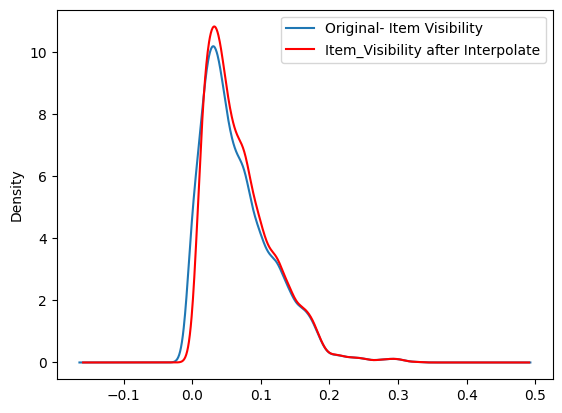

In [109]:
## Check distribution 
data['Item_Visibility'].plot(kind="kde", label="Original- Item Visibility")
data['Item_Visibility_Interpolate'].plot(kind="kde", color = 'red', label="Item_Visibility after Interpolate")
plt.legend()
plt.show()



In [110]:
data = data.drop('Item_Visibility', axis=1)

In [111]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_Interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [112]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [ ]:
data['Item_Identifier'].value_counts()

In [113]:
data['Item_Identifier']= data['Item_Identifier'].apply(lambda x:x[:2])

In [ ]:
data['Item_Identifier'].value_counts()

In [ ]:
data['Outlet_Establishment_Year']

In [114]:
import datetime as dt
current_year = dt.datetime.today().year

In [115]:
current_year 

2025

In [116]:
data["Outlet_age"] = current_year-data['Outlet_Establishment_Year']

In [117]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_Interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,26
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,16
2,FD,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,26
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,27
4,NC,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,38


In [118]:
data = data.drop('Outlet_Establishment_Year', axis=1)

In [119]:
data

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_Interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047,26
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278,16
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760,26
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.200,0.015755,27
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.930,0.014751,38
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,LF,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783,38
8519,FD,Regular,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,8.380,0.046982,23
8520,NC,LF,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186,21
8521,FD,Regular,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221,16


In [120]:
# handing categorical data using ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()
cat_cols= data.select_dtypes(include=['object']).columns
for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [121]:
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_Interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,26
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,16
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,26
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,27
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,38


In [122]:
X = data_encoded.drop('Item_Outlet_Sales', axis=1)
y= data_encoded['Item_Outlet_Sales']

In [123]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [124]:
## Random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X,y, cv=5, scoring = 'r2')

In [126]:
print(scores.mean())

0.5551321920224384


In [127]:
import sys
print(sys.executable)


/Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12


In [128]:
import xgboost

In [129]:
from xgboost import XGBRFRegressor

In [130]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg, X,y, cv=5, scoring = 'r2')
print(scores.mean())

0.5953702116885637


In [136]:
## XGBRFRegressor Feature Importance

xg = XGBRFRegressor(n_estimators=100, random_state=42)
xg1 = xg.fit(X,y)

In [139]:
xg1 = xg.fit(X,y)
pd.DataFrame(
    {'features': X.columns,
     'XGBRF_importance':xg1.feature_importances_
    }).sort_values(by='XGBRF_importance', ascending= False)

,features,XGBRF_importance
7,Outlet_Type,0.434761
10,Outlet_age,0.183352
3,Item_MRP,0.152615
5,Outlet_Size,0.108861
4,Outlet_Identifier,0.103543
6,Outlet_Location_Type,0.008108
9,Item_Visibility_Interpolate,0.002660
8,Item_Weight_Interpolate,0.002275
2,Item_Type,0.001936
0,Item_Identifier,0.001298


In [141]:
X.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight_Interpolate', 'Item_Visibility_Interpolate',
       'Outlet_age'],
      dtype='object')

In [ ]:
Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
       , 'Item_Weight_Interpolate', 'Item_Visibility_Interpolate',
       ],
      dtype='object')

In [142]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg1, X.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type','Item_Weight_Interpolate', 
                                     'Item_Visibility_Interpolate'], axis=1),y, cv=5, scoring = 'r2')
print(scores.mean())

0.5963536512631364


In [143]:
final_data = X.drop(columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type','Item_Weight_Interpolate', 
                                     'Item_Visibility_Interpolate'], axis=1)

In [145]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,26
1,48.2692,3.0,1.0,2.0,16
2,141.6180,9.0,1.0,1.0,26
3,182.0950,0.0,2.0,0.0,27
4,53.8614,1.0,0.0,1.0,38
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,38
8519,108.1570,7.0,2.0,1.0,23
8520,85.1224,6.0,2.0,1.0,21
8521,103.1332,3.0,1.0,2.0,16


In [146]:
## Final Model

from xgboost import XGBRFRegressor
xg_final = XGBRFRegressor()
xg_final.fit(final_data,y)



XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [151]:
X_train,X_test, y_train,y_test= train_test_split(final_data, y, test_size=0.20, random_state=42)

In [152]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [153]:
y_pred = xg_final.predict(X_test)

In [154]:
mean_absolute_error(y_test, y_pred)

np.float64(714.2475682323146)

In [ ]:
## Prediction on unseen data
